# Demo do projeto

Através deste notebook é possível testar o funcionamento do nosso projeto de uma forma ágil e simples. Está dividido em várias secções cujo objetivo é facilitar a compreensão geral da simulação e dos algortimos de aprendizagem utilizados.

Podemos separar este notebook nas seguintes secções úteis:
* Teste da simulação e comportamento do agente com o agente aleatório
* Política fixa, análise de desempenho para os problemas
* Algoritmo genético + Redes Neuronais para ambos os problemas
* Aprendizagem por reforço para ambos os problemas

De notar que o nosso projeto foi criado para ser configurado através de ficheiros, nomeadamente: ficheiro do controlador, da simulação e do(s) agente(s). Por agora, os modelos de aprendizagem apenas funcionam com 1 agente, algo que poderá mudar mais tarde.

**Conteúdo dos ficheiros**:
* Ficheiro do Controlador: modo (se teste se aprendizagem); problema (se recoleção, se farol); ficheiro do motor de simulação usado e os vários parâmetros dos algoritmos
* Ficheiro do Motor de Simulação (independente do modo ou do problema): nº de passos máximos; descrição do ambiente (tamanho e elementos) e ficheiro(s) dos agente(s)
* Ficheiro do Agente: id; posição inicial; ângulo inicial e sensor

Como nos apercebemos que pode ser complicado gerir os ficheiros, criámos este notebook para que fosse agilizado o processo de teste.

In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from controladorGenetico import *


 #### *Funções Auxiliares Fixo e Aleatório*

In [2]:
from controlador import criarControlador

def resetFarol(ficheiro_controlador, ficheiro_simulacao, ficheiro_agente,politica):
    texto_controlador = f"A\nF\n{politica}\nMS {ficheiro_simulacao}"
    texto_simulação = f"5\n50\nAG {ficheiro_agente}\n E farol (3,3) False False 100\nE parede (1,2) False True 0\nE parede (1,3) False True 0\nE parede (1,4) False True 0"
    texto_agente = "1\n(0,0)\n0\nS (0,-1) (0,1) (1,0)"

    with open(ficheiro_controlador, "w", encoding="utf-8") as f:
        f.write(texto_controlador)
    with open(ficheiro_simulacao, "w", encoding="utf-8") as f:
        f.write(texto_simulação)
    with open("agentes/"+ficheiro_agente, "w", encoding="utf-8") as f:
        f.write(texto_agente)

def changeTest(ficheiro_controlador):
    with open(ficheiro_controlador, "r", encoding="utf-8") as f:
        linhas = f.readlines()
    linhas[0] = "T\n"
    with open(ficheiro_controlador, "w", encoding="utf-8") as f:
        f.writelines(linhas)



def resetRecolecao(ficheiro_controlador, ficheiro_simulacao, ficheiro_agente,politica,tempo):
    texto_controlador = f"A\nR {tempo}\n{politica}\nMS {ficheiro_simulacao}"
    texto_simulação = f"5\n50\nAG {ficheiro_agente}\nE ninho (3,3) False False 0\nE parede (1,2) False True 0\nE ovo (2,1) True False 10"
    texto_agente = "1\n(0,0)\n0\nS (0,-1) (0,1) (1,0)"

    with open(ficheiro_controlador, "w", encoding="utf-8") as f:
        f.write(texto_controlador)
    with open(ficheiro_simulacao, "w", encoding="utf-8") as f:
        f.write(texto_simulação)
    with open("agentes/"+ficheiro_agente, "w", encoding="utf-8") as f:
        f.write(texto_agente)

## Teste da Simulação com o Agente Aleatório

### Farol

In [3]:
ficheiro_controlador = "controladorAleatorio_farol.txt"
resetFarol(ficheiro_controlador,"simulacao_farol_aleatorio.txt","agente_aleatorio_farol.txt","aleatorio")

In [4]:
controlador = criarControlador(ficheiro_controlador)
controlador.executa()

In [5]:
changeTest(ficheiro_controlador)
controlador = criarControlador(ficheiro_controlador)
controlador.executa()

A * . . .
* . . . .
. P . . .
. P . F .
. P . . .
. . . . .
A * . . .
* P . . .
. P . F .
. P . . . 

. . . . .
. . . . .
A * . . .
* P . F .
. P . . . 

. . . . .
. . . . .
A * . . .
* P . F .
. P . . . 

. . . . .
. . . . .
A * . . .
* P . F .
. P . . . 

. . . . .
. . . . .
A * . . .
* P . F .
. P . . . 

. . . . .
. . . . .
A * . . .
* P . F .
. P . . . 

. . . . .
. . . . .
A * . . .
* P . F .
. P . . . 

. . . . .
. . . . .
. P . . .
A * . F .
* P . . . 

. . . . .
. . . . .
. P . . .
A * . F .
* P . . . 

. . . . .
. . . . .
* P . . .
A * . F .
. P . . . 

. . . . .
. . . . .
* P . . .
A * . F .
. P . . . 

. . . . .
. . . . .
. P . . .
A * . F .
* P . . . 

. . . . .
. . . . .
. P . . .
A * . F .
* P . . . 

. . . . .
. . . . .
* P . . .
A * . F .
. P . . . 

. . . . .
* . . . .
A * . . .
. P . F .
. P . . . 

. . . . .
. . . . .
A * . . .
* P . F .
. P . . . 

. . . . .
. . . . .
. P . . .
A * . F .
* P . . . 

. . . . .
. . . . .
* P . . .
A * . F .
. P . . . 

. . . . .
* . 

### Recolecao

In [6]:
ficheiro_controlador = "controladorAleatorio_recolecao.txt"
resetRecolecao(ficheiro_controlador,"simulacao_recolecao_aleatorio.txt","agente_aleatorio_recolecao.txt","aleatorio",30)

In [7]:
controlador = criarControlador(ficheiro_controlador)
controlador.executa()

In [8]:
changeTest(ficheiro_controlador)
controlador = criarControlador(ficheiro_controlador)
controlador.executa()

A * . . .
* . O . .
. P . . .
. . . N .
. . . . .
A . . . .
* . O . .
. P . . .
. . . N .
. . . . . 

. . . . .
A * O . .
* P . . .
. . . N .
. . . . . 

. . . . .
. . O . .
A * . . .
* . . N .
. . . . . 

. . . . .
* . O . .
A * . . .
. . . N .
. . . . . 

. . . . .
* . O . .
A * . . .
. . . N .
. . . . . 

* . . . .
A * O . .
. P . . .
. . . N .
. . . . . 

. * . . .
. A * . .
. * . . .
. . . N .
. . . . . 

. * . . .
* A O . .
. * . . .
. . . N .
. . . . . 

* . . . .
A . O . .
* P . . .
. . . N .
. . . . . 

* . . . .
A * O . .
* P . . .
. . . N .
. . . . . 

. * . . .
. A * . .
. * . . .
. . . N .
. . . . . 

. . * . .
. . A * .
. P * . .
. . . N .
. . . . . 

. . * . .
. * A . .
. P * . .
. . . N .
. . . . . 

. * A * .
. . . . .
. P . . .
. . . N .
. . . . . 

. . . A *
. . . * .
. P . . .
. . . N .
. . . . . 

. . . A *
. . . * .
. P . . .
. . . N .
. . . . . 

. . . . A
. . . . *
. P . . .
. . . N .
. . . . . 

. . . . .
. . . * A
. P . . *
. . . N .
. . . . . 

. . . . .
. . 

## Teste da Política Fixa

### Farol

In [9]:
ficheiro_controlador = "controladorFixo_farol.txt"
resetFarol(ficheiro_controlador, "simulacao_farol_fixo.txt", "agente_fixo_farol.txt", "fixo")
controlador = criarControlador(ficheiro_controlador)

In [10]:
controlador.executa()

In [11]:
changeTest(ficheiro_controlador)
controlador = criarControlador(ficheiro_controlador)
controlador.executa()

A * . . .
* . . . .
. P . . .
. P . F .
. P . . .
. . . . .
A * . . .
* P . . .
. P . F .
. P . . . 

. * . . .
. A * . .
. * . . .
. P . F .
. P . . . 

. . * . .
. . A * .
. P * . .
. P . F .
. P . . . 

. . . . .
. . . . .
. * A * .
. P * F .
. P . . . 

. . . . .
. . . . .
. P . . .
. * A * .
. P * . . 

. . . . .
. . . . .
. P . * .
. P . A *
. P . * . 



### Recolecao

In [12]:
ficheiro_controlador = "controladorFixo_recolecao.txt"
resetFarol(ficheiro_controlador, "simulacao_recolecao_fixo.txt", "agente_fixo_recolecao.txt", "fixo")
controlador = criarControlador(ficheiro_controlador)

In [13]:
controlador.executa()

In [14]:
changeTest(ficheiro_controlador)
controlador = criarControlador(ficheiro_controlador)
controlador.executa()

A * . . .
* . . . .
. P . . .
. P . F .
. P . . .
. . . . .
A * . . .
* P . . .
. P . F .
. P . . . 

. * . . .
. A * . .
. * . . .
. P . F .
. P . . . 

. . * . .
. . A * .
. P * . .
. P . F .
. P . . . 

. . . . .
. . . . .
. * A * .
. P * F .
. P . . . 

. . . . .
. . . . .
. P . . .
. * A * .
. P * . . 

. . . . .
. . . . .
. P . * .
. P . A *
. P . * . 



## Teste do Algoritmo Genético

In [15]:
import matplotlib.pyplot as plt
import numpy as np
#so para funcionae

def construirGrafico(controlador):
    motor = controlador.criar_motor("genetico")
    agente = motor.agentes[0]
    caminhos = [reconstruir_caminho(agente.posicaoAtual, agente.angulo, c) for c in controlador.melhores_caminhos_gen]

    fig, ax = plt.subplots(figsize=(10, 10), dpi=100)
    fig.patch.set_facecolor('white')
    ax.set_facecolor('white')

    grelha_size = motor.ambiente.tamanhoGrelha

    ax.set_xlim(0, grelha_size)
    ax.set_ylim(grelha_size, 0)

    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')

    cmap = plt.get_cmap("rainbow")
    colors = cmap(np.linspace(0, 1, len(caminhos)))

    if len(caminhos) == 1:
        plot_gens = [0]
    else:
        indices = {0, len(caminhos)//2, len(caminhos)-1}
        plot_gens = sorted(list(indices))

    for i in plot_gens:
        path = caminhos[i]

        x_vals = [p.getX() for p in path]
        y_vals = [p.getY() for p in path]

        ax.plot(x_vals, y_vals, color=colors[i], alpha=0.7,
                label=f"Geração {i+1}", linewidth=2)

        if x_vals:
            ax.plot(x_vals[-1], y_vals[-1], 'x', color=colors[i],
                    markersize=10, markeredgewidth=2)

    for pos, ele in motor.ambiente.grelha.items():
        if ele.getId() != (-1, -1, -1):
            ax.text(
                pos.x,
                pos.y,
                str(ele) if hasattr(ele, "nome") else str(ele),
                fontsize=8,
                ha="center",
                va="center",
                color="black",
                fontweight="bold"
            )

    ax.set_title("Melhores Caminhos por Geração", y=1.08)
    ax.set_xlabel("X")
    ax.set_ylabel("Y")

    ax.spines['bottom'].set_color('black')
    ax.spines['top'].set_color('black')
    ax.spines['left'].set_color('black')
    ax.spines['right'].set_color('black')
    ax.grid(True, color='lightgray', linestyle='--')

    ax.legend(loc='lower right')
    plt.show()

### Farol

In [16]:
from controlador import criarControlador

def resetFarolGenetico(ficheiro_controlador, ficheiro_simulacao, ficheiro_agente, politica,geracoes,num_individuos,taxa_mutacao,taxa_elite,novelty_weight,num_novelty,num_archives,torneio):
    texto_controlador = f"A\nF\n{politica}\n{geracoes}\n{num_individuos}\n{taxa_mutacao}\n{taxa_elite}\n{novelty_weight}\n{num_novelty}\n{num_archives}\n{torneio}\nMS {ficheiro_simulacao}"
    texto_simulacao = f"5\n50\nAG {ficheiro_agente}\n E farol (3,3) False False 100\nE parede (1,2) False True 0\nE parede (1,3) False True 0\nE parede (1,4) False True 0"
    texto_agente = "1\n(0,0)\n0\nS (0,-1) (0,1) (1,0)"

    with open(ficheiro_controlador, "w", encoding="utf-8") as f:
        f.write(texto_controlador)
    with open(ficheiro_simulacao, "w", encoding="utf-8") as f:
        f.write(texto_simulacao)
    with open("agentes/" + ficheiro_agente, "w", encoding="utf-8") as f:
        f.write(texto_agente)


def changeTest(ficheiro_controlador):
    with open(ficheiro_controlador, "r", encoding="utf-8") as f:
        linhas = f.readlines()
    linhas[0] = "T\n"
    with open(ficheiro_controlador, "w", encoding="utf-8") as f:
        f.writelines(linhas)



In [17]:
GERACOES = 100
NUM_INDIVIDUOS = 200
TAXA_MUTACAO = 0.15
TAXA_ELITE = 0.1
NOVELTY_WEIGHT = 300
NUMBER_NOVELTY = 15
NUMBER_ARCHIVES = 3
NUM_TORNEIO = 5

ficheiro_controlador = "controladorGenetico_farol.txt"
resetFarolGenetico(ficheiro_controlador, "simulacao_farol_genetico.txt", "agente_genetico_farol.txt", "genetico",GERACOES,NUM_INDIVIDUOS,TAXA_MUTACAO,TAXA_ELITE,NOVELTY_WEIGHT,NUMBER_NOVELTY,NUMBER_ARCHIVES,NUM_TORNEIO)


In [18]:
controlador = criarControlador(ficheiro_controlador)
controlador.executa()

Gen 1/100 | Avg Combined: -659.98 | Melhor fitness: 295.10)
Gen 2/100 | Avg Combined: -187.55 | Melhor fitness: 175.10)
Gen 3/100 | Avg Combined: 49.63 | Melhor fitness: 155.10)
Gen 4/100 | Avg Combined: 54.04 | Melhor fitness: 155.10)
Gen 5/100 | Avg Combined: 18.41 | Melhor fitness: 155.10)
Gen 6/100 | Avg Combined: 27.46 | Melhor fitness: 141.77)
Gen 7/100 | Avg Combined: -85.06 | Melhor fitness: 135.10)
Gen 8/100 | Avg Combined: -142.77 | Melhor fitness: 135.10)
Gen 9/100 | Avg Combined: 122.97 | Melhor fitness: 135.10)
Gen 10/100 | Avg Combined: 99.58 | Melhor fitness: 135.10)
Gen 11/100 | Avg Combined: 111.65 | Melhor fitness: 135.10)
Gen 12/100 | Avg Combined: 129.07 | Melhor fitness: 135.10)
Gen 13/100 | Avg Combined: 123.05 | Melhor fitness: 135.10)
Gen 14/100 | Avg Combined: 128.91 | Melhor fitness: 135.10)
Gen 15/100 | Avg Combined: 117.05 | Melhor fitness: 135.10)
Gen 16/100 | Avg Combined: 123.68 | Melhor fitness: 135.10)
Gen 17/100 | Avg Combined: 135.10 | Melhor fitness:

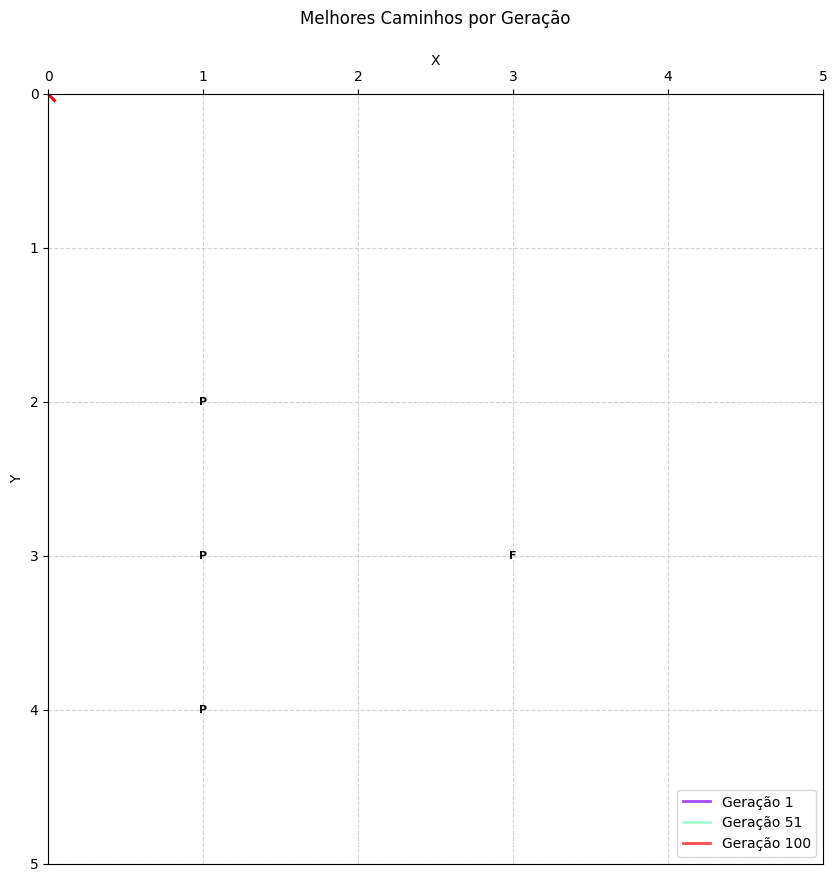

In [19]:
construirGrafico(controlador)

In [20]:
changeTest(ficheiro_controlador)
controlador = criarControlador(ficheiro_controlador)
controlador.executa()

A * . . .
* . . . .
. P . . .
. P . F .
. P . . .
A . . . .
* . . . .
. P . . .
. P . F .
. P . . . 

A * . . .
* . . . .
. P . . .
. P . F .
. P . . . 

A . . . .
* . . . .
. P . . .
. P . F .
. P . . . 

A * . . .
* . . . .
. P . . .
. P . F .
. P . . . 

A . . . .
* . . . .
. P . . .
. P . F .
. P . . . 

A * . . .
* . . . .
. P . . .
. P . F .
. P . . . 

A . . . .
* . . . .
. P . . .
. P . F .
. P . . . 

A * . . .
* . . . .
. P . . .
. P . F .
. P . . . 

A . . . .
* . . . .
. P . . .
. P . F .
. P . . . 

A * . . .
* . . . .
. P . . .
. P . F .
. P . . . 

A . . . .
* . . . .
. P . . .
. P . F .
. P . . . 

A * . . .
* . . . .
. P . . .
. P . F .
. P . . . 

A . . . .
* . . . .
. P . . .
. P . F .
. P . . . 

A * . . .
* . . . .
. P . . .
. P . F .
. P . . . 

A . . . .
* . . . .
. P . . .
. P . F .
. P . . . 

A * . . .
* . . . .
. P . . .
. P . F .
. P . . . 

A . . . .
* . . . .
. P . . .
. P . F .
. P . . . 

A * . . .
* . . . .
. P . . .
. P . F .
. P . . . 

A . . . .
* . 

### Recoleção

In [21]:
from controlador import criarControlador

def resetRecolecaoGenetico(ficheiro_controlador, ficheiro_simulacao, ficheiro_agente, politica, tempo,geracoes,num_individuos,taxa_mutacao,taxa_elite,novelty_weight,num_novelty,num_archives,torneio):
    texto_controlador = f"A\nR {tempo}\n{politica}\n{geracoes}\n{num_individuos}\n{taxa_mutacao}\n{taxa_elite}\n{novelty_weight}\n{num_novelty}\n{num_archives}\n{torneio}\nMS {ficheiro_simulacao}"
    texto_simulação = f"5\n50\nAG {ficheiro_agente}\nE ninho (3,3) False False 0\nE parede (1,2) False True 0\nE ovo (2,1) True False 7"
    texto_agente = "1\n(0,0)\n0\nS (0,-1) (0,1) (1,0)"

    with open(ficheiro_controlador, "w", encoding="utf-8") as f:
        f.write(texto_controlador)
    with open(ficheiro_simulacao, "w", encoding="utf-8") as f:
        f.write(texto_simulação)
    with open("agentes/" + ficheiro_agente, "w", encoding="utf-8") as f:
        f.write(texto_agente)

In [22]:
GERACOES = 100
NUM_INDIVIDUOS = 200
TAXA_MUTACAO = 0.1
TAXA_ELITE = 0.2
NOVELTY_WEIGHT = 1000
NUMBER_NOVELTY = 5
NUMBER_ARCHIVES = 5
NUM_TORNEIO = 5

ficheiro_controlador = "controladorGenetico_recolecao.txt"
resetRecolecaoGenetico(ficheiro_controlador, "simulacao_recolecao_genetico.txt", "agente_genetico_recolecao.txt", "genetico", 30,GERACOES,NUM_INDIVIDUOS,TAXA_MUTACAO,TAXA_ELITE,NOVELTY_WEIGHT,NUMBER_NOVELTY,NUMBER_ARCHIVES,NUM_TORNEIO)
controlador = criarControlador(ficheiro_controlador)
controlador.executa()

Gen 1/100 | Avg Combined: -400.27 | Melhor fitness: 828.43)
Gen 2/100 | Avg Combined: 119.52 | Melhor fitness: 395.10)
Gen 3/100 | Avg Combined: 341.39 | Melhor fitness: 395.10)
Gen 4/100 | Avg Combined: 380.31 | Melhor fitness: 395.10)
Gen 5/100 | Avg Combined: 368.02 | Melhor fitness: 395.10)
Gen 6/100 | Avg Combined: 387.77 | Melhor fitness: 395.10)
Gen 7/100 | Avg Combined: 389.10 | Melhor fitness: 395.10)
Gen 8/100 | Avg Combined: 381.77 | Melhor fitness: 395.10)
Gen 9/100 | Avg Combined: 395.10 | Melhor fitness: 395.10)
Gen 10/100 | Avg Combined: 387.64 | Melhor fitness: 395.10)
Gen 11/100 | Avg Combined: 381.77 | Melhor fitness: 395.10)
Gen 12/100 | Avg Combined: 369.18 | Melhor fitness: 395.10)
Gen 13/100 | Avg Combined: 377.10 | Melhor fitness: 395.10)
Gen 14/100 | Avg Combined: 381.64 | Melhor fitness: 395.10)
Gen 15/100 | Avg Combined: 382.14 | Melhor fitness: 395.10)
Gen 16/100 | Avg Combined: 370.02 | Melhor fitness: 395.10)
Gen 17/100 | Avg Combined: 379.77 | Melhor fitne

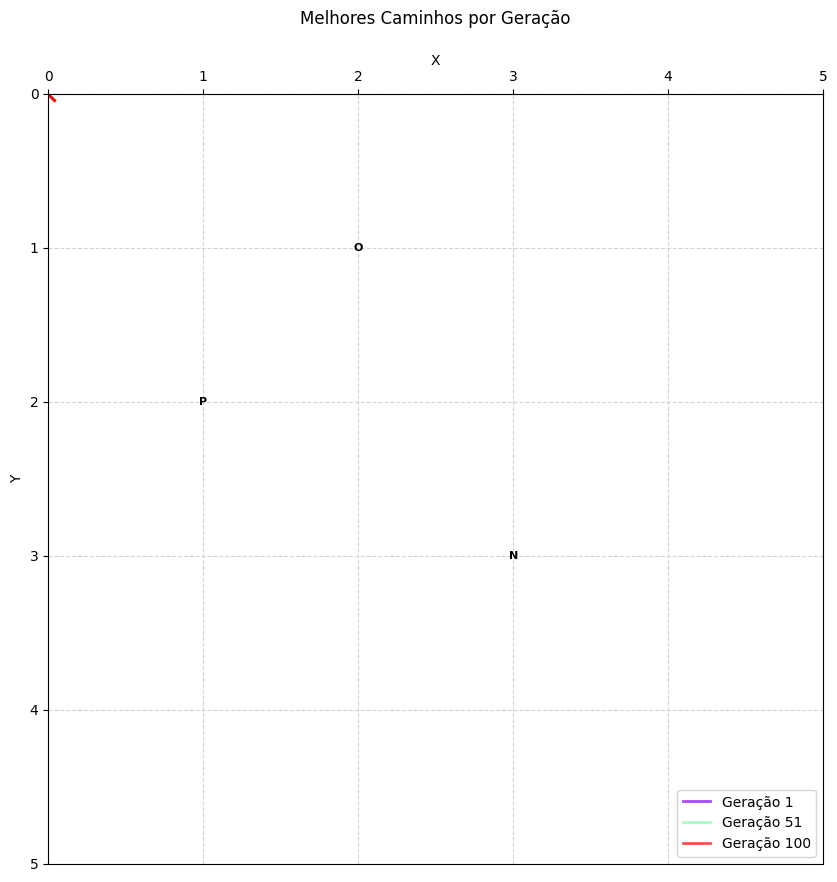

In [23]:
construirGrafico(controlador)

In [24]:
changeTest(ficheiro_controlador)
controlador = criarControlador(ficheiro_controlador)
controlador.executa()

A * . . .
* . O . .
. P . . .
. . . N .
. . . . .
A . . . .
* . O . .
. P . . .
. . . N .
. . . . . 

A * . . .
* . O . .
. P . . .
. . . N .
. . . . . 

A . . . .
* . O . .
. P . . .
. . . N .
. . . . . 

A * . . .
* . O . .
. P . . .
. . . N .
. . . . . 

A . . . .
* . O . .
. P . . .
. . . N .
. . . . . 

A * . . .
* . O . .
. P . . .
. . . N .
. . . . . 

A . . . .
* . O . .
. P . . .
. . . N .
. . . . . 

A * . . .
* . O . .
. P . . .
. . . N .
. . . . . 

A . . . .
* . O . .
. P . . .
. . . N .
. . . . . 

A * . . .
* . O . .
. P . . .
. . . N .
. . . . . 

A . . . .
* . O . .
. P . . .
. . . N .
. . . . . 

A * . . .
* . O . .
. P . . .
. . . N .
. . . . . 

A . . . .
* . O . .
. P . . .
. . . N .
. . . . . 

A * . . .
* . O . .
. P . . .
. . . N .
. . . . . 

A . . . .
* . O . .
. P . . .
. . . N .
. . . . . 

A * . . .
* . O . .
. P . . .
. . . N .
. . . . . 

A . . . .
* . O . .
. P . . .
. . . N .
. . . . . 

A * . . .
* . O . .
. P . . .
. . . N .
. . . . . 

A . . . .
* . 

## Teste Algoritmo Reforço

### Farol

In [25]:
from controlador import criarControlador

def resetFarolReforco(ficheiro_controlador, ficheiro_simulacao, ficheiro_agente, politica,episodios,alpha,gama,eps_inicial,eps_final):
    texto_controlador = f"A\nF\n{politica}\n{episodios}\nMS {ficheiro_simulacao}"
    texto_simulação = f"5\n50\nAG {ficheiro_agente}\n E farol (3,3) False False 100\nE parede (1,2) False True 0\nE parede (1,3) False True 0\nE parede (1,4) False True 0"
    texto_agente = f"1\n(0,0)\n0\nS (0,-1) (0,1) (1,0)\n{alpha}\n{gama}\n{eps_inicial}\n{eps_final}"

    with open(ficheiro_controlador, "w", encoding="utf-8") as f:
        f.write(texto_controlador)
    with open(ficheiro_simulacao, "w", encoding="utf-8") as f:
        f.write(texto_simulação)
    with open("agentes/" + ficheiro_agente, "w", encoding="utf-8") as f:
        f.write(texto_agente)


def changeTest(ficheiro_controlador):
    with open(ficheiro_controlador, "r", encoding="utf-8") as f:
        linhas = f.readlines()
    linhas[0] = "T\n"
    with open(ficheiro_controlador, "w", encoding="utf-8") as f:
        f.writelines(linhas)


In [26]:
EPISODIOS = 20000
ALPHA = 0.3
GAMA = 0.95
EPS_INICIAL = 1
EPS_FINAL = 0.05

ficheiro_controlador = "controladorReforco_farol.txt"
resetFarolReforco(ficheiro_controlador, "simulacao_farol_reforco.txt", "agente_reforco_farol.txt", "reforco",
                  EPISODIOS,ALPHA,GAMA,EPS_INICIAL,EPS_FINAL)
controlador = criarControlador(ficheiro_controlador)
controlador.executa()

Episódio: 0/20000: Recompensa máxima encontrada: 0
Episódio: 1000/20000: Recompensa máxima encontrada: 6969.863384889016
Episódio: 2000/20000: Recompensa máxima encontrada: 8948.042137035707
Episódio: 3000/20000: Recompensa máxima encontrada: 9594.042223166718
Episódio: 4000/20000: Recompensa máxima encontrada: 9856.919394346529
Episódio: 5000/20000: Recompensa máxima encontrada: 9949.57096308424
Episódio: 6000/20000: Recompensa máxima encontrada: 9981.40175831853
Episódio: 7000/20000: Recompensa máxima encontrada: 9995.299231517414
Episódio: 8000/20000: Recompensa máxima encontrada: 9998.15831583866
Episódio: 9000/20000: Recompensa máxima encontrada: 9999.416059401075
Episódio: 10000/20000: Recompensa máxima encontrada: 9999.84787759415
Episódio: 11000/20000: Recompensa máxima encontrada: 9999.953202875937
Episódio: 12000/20000: Recompensa máxima encontrada: 9999.986242046587
Episódio: 13000/20000: Recompensa máxima encontrada: 9999.994770350444
Episódio: 14000/20000: Recompensa máxim

In [27]:
changeTest(ficheiro_controlador)
controlador = criarControlador(ficheiro_controlador)
controlador.executa()

A * . . .
* . . . .
. P . . .
. P . F .
. P . . .
. A * . .
. * . . .
. P . . .
. P . F .
. P . . . 

* A . . .
. * . . .
. P . . .
. P . F .
. P . . . 

* A . . .
. * . . .
. P . . .
. P . F .
. P . . . 

A . . . .
* . . . .
. P . . .
. P . F .
. P . . . 

A . . . .
* . . . .
. P . . .
. P . F .
. P . . . 

A . . . .
* . . . .
. P . . .
. P . F .
. P . . . 

A . . . .
* . . . .
. P . . .
. P . F .
. P . . . 

A . . . .
* . . . .
. P . . .
. P . F .
. P . . . 

. . . . .
A * . . .
* P . . .
. P . F .
. P . . . 

. . . . .
A * . . .
* P . . .
. P . F .
. P . . . 

. * . . .
. A * . .
. * . . .
. P . F .
. P . . . 

. * . . .
* A . . .
. * . . .
. P . F .
. P . . . 

. * . . .
* A . . .
. * . . .
. P . F .
. P . . . 

. * . . .
. A * . .
. * . . .
. P . F .
. P . . . 

* A * . .
. . . . .
. P . . .
. P . F .
. P . . . 

A . . . .
* . . . .
. P . . .
. P . F .
. P . . . 

A . . . .
* . . . .
. P . . .
. P . F .
. P . . . 

A * . . .
* . . . .
. P . . .
. P . F .
. P . . . 

. . . . .
A * 

### Recolecao

In [28]:
from controlador import criarControlador

def resetRecolecaoReforco(ficheiro_controlador, ficheiro_simulacao, ficheiro_agente, politica,tempo,episodios,alpha,gama,eps_inicial,eps_final):
    texto_controlador = f"A\nR {tempo}\n{politica}\n{episodios}\nMS {ficheiro_simulacao}"
    texto_simulação = f"5\n50\nAG {ficheiro_agente}\nE ninho (3,3) False False 0\nE parede (1,2) False True 0\nE ovo (2,1) True False 10"
    texto_agente = f"1\n(0,0)\n0\nS (0,-1) (0,1) (1,0)\n{alpha}\n{gama}\n{eps_inicial}\n{eps_final}"

    with open(ficheiro_controlador, "w", encoding="utf-8") as f:
        f.write(texto_controlador)
    with open(ficheiro_simulacao, "w", encoding="utf-8") as f:
        f.write(texto_simulação)
    with open("agentes/" + ficheiro_agente, "w", encoding="utf-8") as f:
        f.write(texto_agente)

In [29]:
EPISODIOS = 10000
ALPHA = 0.4
GAMA = 0.99
EPS_INICIAL = 1
EPS_FINAL = 0.05

ficheiro_controlador = "controladorReforco_recolecao.txt"
resetRecolecaoReforco(ficheiro_controlador, "simulacao_recolecao_reforco.txt", "agente_reforco_recolecao.txt", "reforco",30,
                  EPISODIOS, ALPHA, GAMA, EPS_INICIAL, EPS_FINAL)
controlador = criarControlador(ficheiro_controlador)
controlador.executa()

Episódio: 0/10000: Recompensa máxima encontrada: 720.0
Episódio: 1000/10000: Recompensa máxima encontrada: 8529.321595855894
Episódio: 2000/10000: Recompensa máxima encontrada: 15404.970420563699
Episódio: 3000/10000: Recompensa máxima encontrada: 18060.587353694755
Episódio: 4000/10000: Recompensa máxima encontrada: 22057.74201848971
Episódio: 5000/10000: Recompensa máxima encontrada: 24474.326713612973
Episódio: 6000/10000: Recompensa máxima encontrada: 26935.438698293263
Episódio: 7000/10000: Recompensa máxima encontrada: 29538.469436724816
Episódio: 8000/10000: Recompensa máxima encontrada: 32552.758754683025
Episódio: 9000/10000: Recompensa máxima encontrada: 34777.945422937555
Episódio: 10000/10000: Recompensa máxima encontrada: 37691.2717712536


In [30]:
changeTest(ficheiro_controlador)
controlador = criarControlador(ficheiro_controlador)
controlador.executa()

A * . . .
* . O . .
. P . . .
. . . N .
. . . . .
A * . . .
* . O . .
. P . . .
. . . N .
. . . . . 

. A * . .
. * O . .
. P . . .
. . . N .
. . . . . 

. A * . .
. * O . .
. P . . .
. . . N .
. . . . . 

. A * . .
. * O . .
. P . . .
. . . N .
. . . . . 

. A * . .
. * O . .
. P . . .
. . . N .
. . . . . 

* A . . .
. * O . .
. P . . .
. . . N .
. . . . . 

. . . . .
* A * . .
. * . . .
. . . N .
. . . . . 

. . * . .
. . A * .
. P * . .
. . . N .
. . . . . 

. . . * .
. . . A *
. P . * .
. . . N .
. . . . . 

. . . * .
. . * A .
. P . * .
. . . N .
. . . . . 

. . . . .
. . . . .
. P * A *
. . . * .
. . . . . 

. . . . .
. . . * .
. P * A *
. . . N .
. . . . . 

. . . . .
. . . . .
. P * A *
. . . * .
. . . . . 

. . . . .
. . . . *
. P . . A
. . . N *
. . . . . 

. . . . .
. . . . .
. P . . .
. . . * A
. . . . * 

. . . . .
. . . . .
. P . . .
. . . * A
. . . . * 

. . . . .
. . . . .
. P . . .
. . . * A
. . . . * 

. . . . .
. . . . .
. P . * .
. . * A .
. . . * . 

